# Imports

In [1]:
# %pip install matplotlib pandas numpy statsmodels scikit-learn xgboost tensorflow graphviz

In [2]:
# Standard libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Data splitting and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Metrics and evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Neural networks (Keras / TensorFlow)
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

# Tree visualization
import graphviz

# Suppress warnings
warnings.filterwarnings("ignore")

# Data Prep

In [3]:
df = pd.read_csv("../data/classification.csv")

In [4]:
df = df.dropna()

In [5]:
X = df.drop("Y", axis=1)
y = df["Y"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# confusion_matrix Function (Evaluación)

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes=None, normalize=True,
                          title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(6,5)):
    """
    Plots a confusion matrix with counts y, opcionalmente, proporciones.
    """
    # 1) Determinar clases si no vienen dadas
    if classes is None:
        classes = np.unique(np.concatenate([y_true, y_pred]))

    # 2) Calcular matriz
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    cm = np.array(cm, dtype=int)

    # 3) Normalizar por fila
    if normalize:
        with np.errstate(all='ignore'):
            cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
            cm_norm = np.nan_to_num(cm_norm, 0.0)
    else:
        cm_norm = np.zeros_like(cm, dtype=float)

    # 4) Dibujar
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)

    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45, ha='right')
    plt.yticks(ticks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # 5) Anotar
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            if normalize:
                prop = cm_norm[i, j]
                label = f"{count}\n({prop:.2f})"
            else:
                label = f"{count}"
            plt.text(j, i, label,
                     ha="center", va="center",
                     color="white" if count > thresh else "black")

    plt.tight_layout()
    plt.show()

# Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



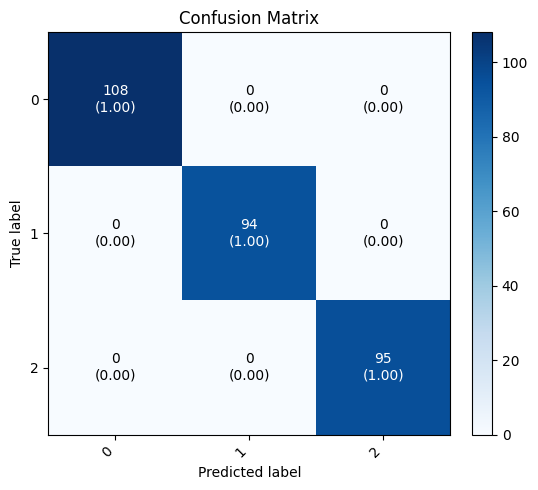

In [9]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=logistic_model.classes_)

# LDA

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



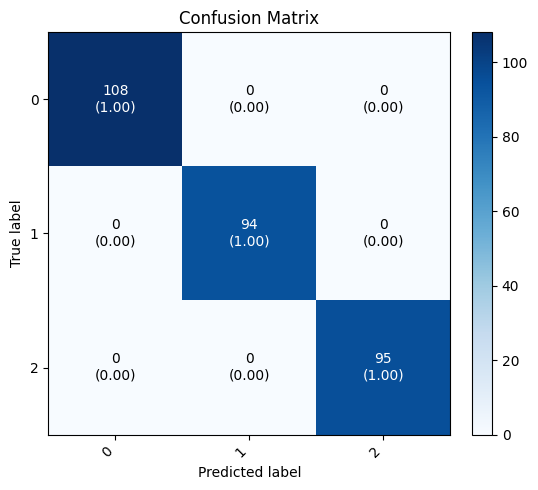

In [10]:
# 2. Entrenar LDA con datos escalados
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# 3. Predicción sobre el test escalado
y_pred = lda_model.predict(X_test_scaled)

# 4. Métricas
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=lda_model.classes_)

# QDA

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



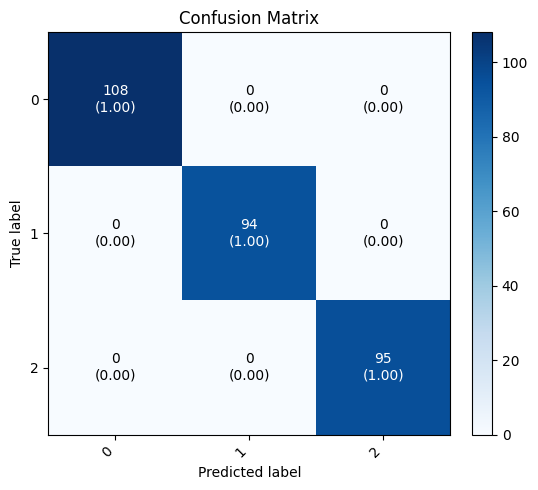

In [11]:
# 2. Entrenar QDA con datos escalados
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)

# 3. Predicción sobre el test escalado
y_pred = qda_model.predict(X_test_scaled)

# 4. Métricas
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=qda_model.classes_)

# KNN

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



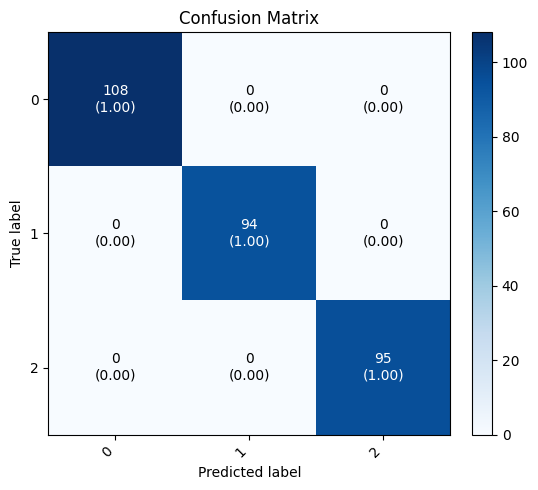

In [12]:
# 2. Entrenar KNN con datos escalados
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# 3. Predicción sobre el test escalado
y_pred = knn_model.predict(X_test_scaled)

# 4. Métricas
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=knn_model.classes_)

# Multicolinealidad

In [13]:
X_features = df.drop("Y", axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_features.values, i)
    for i in range(len(X_features.columns))
]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
6,X7,52.978855
13,X14,42.144400
10,X11,41.025384
1,X2,39.682182
12,X13,38.514948
9,X10,35.837102
8,X9,34.093331
5,X6,30.431179
14,X15,29.243941
11,X12,25.662399


In [14]:
X_features = df.drop("Y", axis=1).copy()
threshold = 5

while True:
    vif_data = pd.DataFrame(
        {
            "feature": X_features.columns,
            "VIF": [
                variance_inflation_factor(X_features.values, i)
                for i in range(X_features.shape[1])
            ],
        }
    ).sort_values("VIF", ascending=False)

    max_vif = vif_data["VIF"].iloc[0]
    drop_feature = vif_data["feature"].iloc[0]
    print(vif_data, "\n")

    if max_vif <= threshold:
        print("All VIF values are below the threshold!")
        break

    if drop_feature in X_features.columns:
        print(f"Dropping {drop_feature} with VIF = {max_vif:.2f}")
        X_features = X_features.drop(columns=[drop_feature])
    else:
        print(f"» Warning: {drop_feature} not found in X_features, skipping.")
        break

   feature        VIF
6       X7  52.978855
13     X14  42.144400
10     X11  41.025384
1       X2  39.682182
12     X13  38.514948
9      X10  35.837102
8       X9  34.093331
5       X6  30.431179
14     X15  29.243941
11     X12  25.662399
2       X3  23.687716
0       X1  16.243252
4       X5  16.189734
3       X4  12.689104
7       X8   7.582129 

Dropping X7 with VIF = 52.98
   feature        VIF
12     X14  39.303975
1       X2  38.754066
9      X11  37.517855
11     X13  36.587792
8      X10  35.708046
7       X9  33.336703
13     X15  29.206697
5       X6  28.931070
10     X12  25.416008
2       X3  23.643420
4       X5  16.186650
0       X1  16.155865
3       X4  12.687135
6       X8   7.562611 

Dropping X14 with VIF = 39.30
   feature        VIF
1       X2  38.646431
11     X13  35.944231
9      X11  34.497786
8      X10  33.931380
7       X9  32.343365
12     X15  29.200065
5       X6  27.481546
10     X12  24.910346
2       X3  23.460596
4       X5  16.026280
0       X1  1

In [15]:
print(f"Final number of features: {X_features.shape[1]}")
print("Remaining features:", list(X_features.columns))

Final number of features: 3
Remaining features: ['X1', 'X8', 'X13']


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



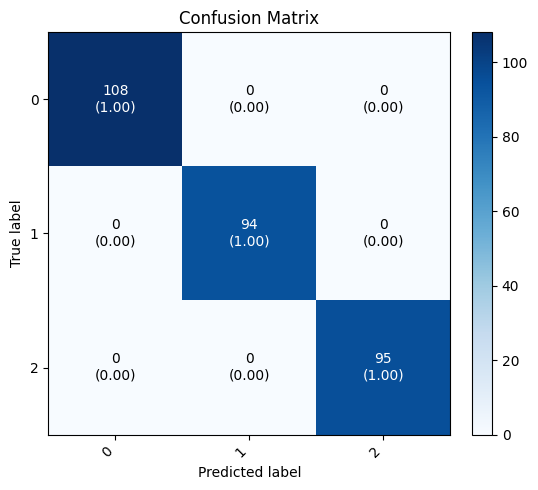

In [16]:
selected_features = X_features.columns
X_selected = X_features[selected_features]
y_selected = df["Y"]

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_vif, y_train_vif)

y_pred = logistic_model.predict(X_test_vif)

print("Classification Report:\n", classification_report(y_test_vif, y_pred))
plot_confusion_matrix(y_test_vif, y_pred, classes=logistic_model.classes_)

# DecisionTree

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



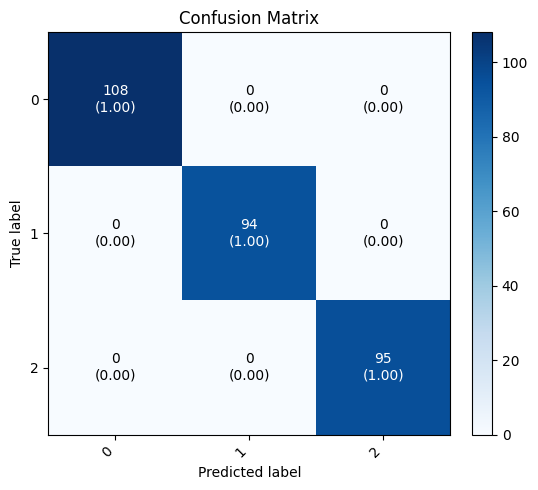

In [17]:
# 2. Entrenar DecisionTree con datos escalados
decisiontree_model = DecisionTreeClassifier(random_state=42)
decisiontree_model.fit(X_train_vif, y_train_vif)


# 3. Predicción sobre el test escalado
y_pred = decisiontree_model.predict(X_test_vif)

# 4. Métricas
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=decisiontree_model.classes_)

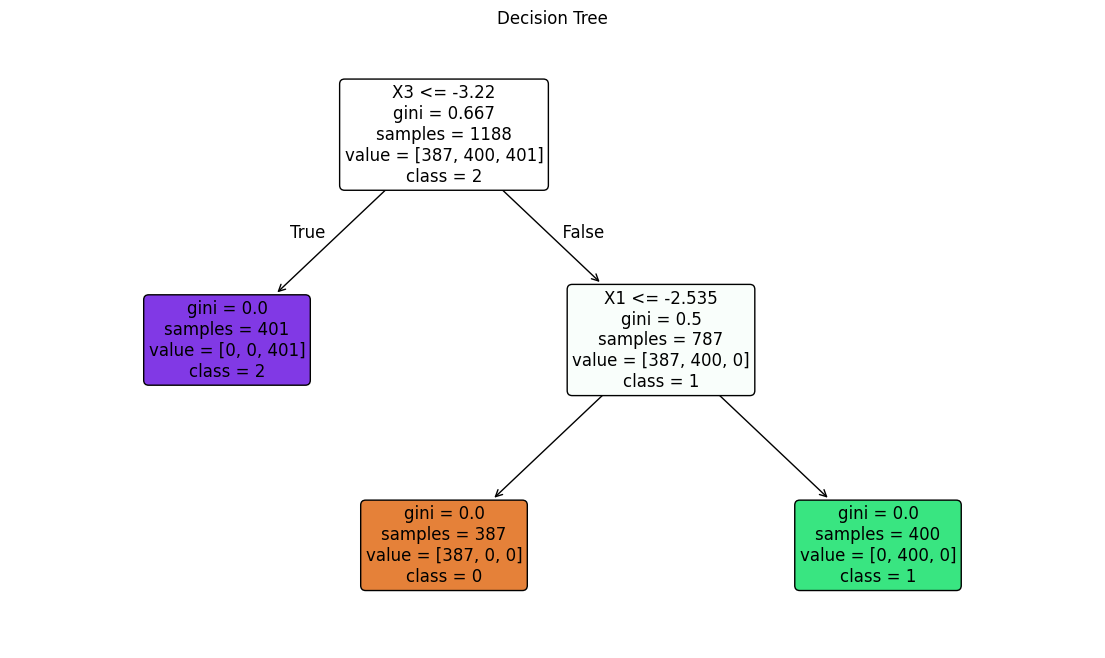

In [18]:
dot_data = export_graphviz(
    decisiontree_model,
    out_file=None,
    feature_names=X_train_vif.columns,
    class_names=[str(c) for c in decisiontree_model.classes_],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph.render("tree", format="png", cleanup=False)
graph.view()

plt.figure(figsize=(14, 8))
plot_tree(
    decisiontree_model,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=[str(c) for c in decisiontree_model.classes_],
    fontsize=12,
)
plt.title("Decision Tree")
plt.show()

# RandomForest

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



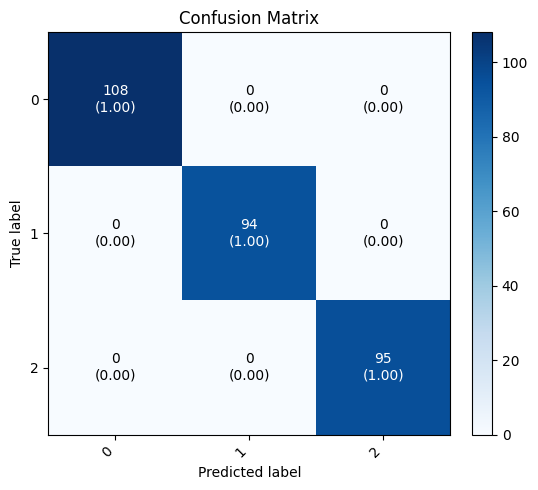

In [19]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [5, 10, 20],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False],
}

grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

# 4. Métricas
print("Best parameters found:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=best_rf.classes_)

# AdaBoost

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'estimator__max_depth': 1, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



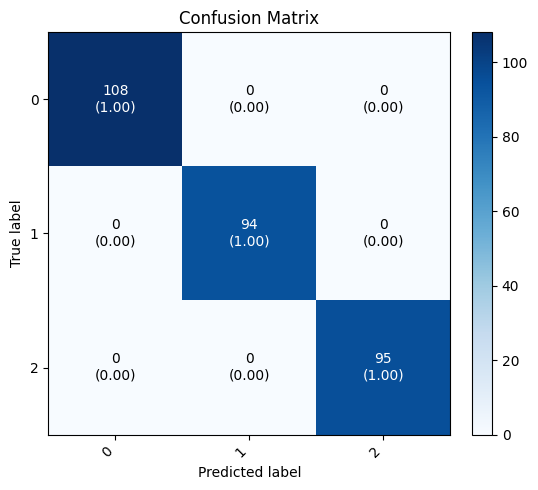

In [20]:
base_estimator = DecisionTreeClassifier(random_state=42)

ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

param_grid_ada = {
    "n_estimators": [5, 10, 15],
    "learning_rate": [0.01, 0.1, 1.0],
    "estimator__max_depth": [1, 3, 5],
    "estimator__min_samples_split": [2, 5],
}

grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

grid_search_ada.fit(X_train_scaled, y_train)

best_ada = grid_search_ada.best_estimator_

y_pred = best_ada.predict(X_test_scaled)

# 4. Métricas
print("Best parameters found:", grid_search_ada.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=best_ada.classes_)

# XGBClassifier

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:56:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:56:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:56:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/enriquegomeztagle/anaconda3/envs/ML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:56:49] WARNING: /Users/runner/work/xgboost/

Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



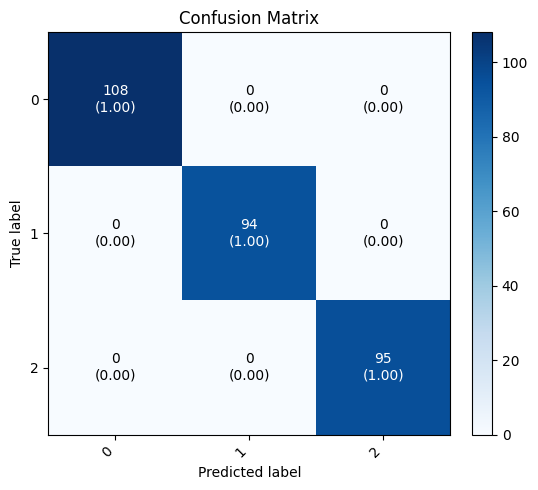

In [21]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

param_grid_xgb = {
    "n_estimators": [5, 10, 15],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_

y_pred = best_xgb.predict(X_test_scaled)

# 4. Métricas
print("Best parameters found:", grid_search_xgb.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=best_xgb.classes_)

# Redes Neuronales


MLPClassifier Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        95

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



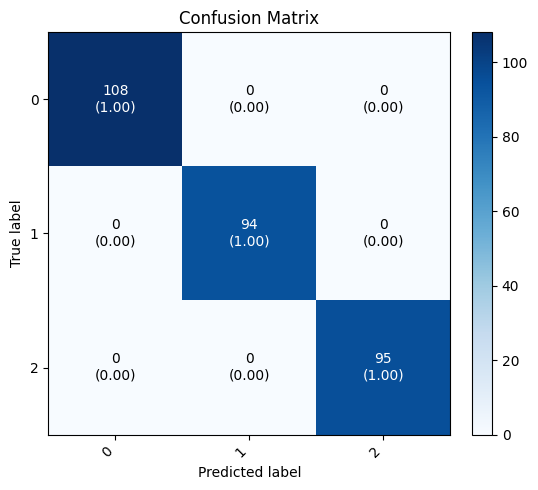

In [24]:
clf = MLPClassifier(
    solver='lbfgs',
    alpha=1,
    hidden_layer_sizes=(60,),
    random_state=1,
    max_iter=1000
)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nMLPClassifier Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=clf.classes_)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.5074 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 3.9913e-04
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 1.0000 - loss: 8.3097e-04 - val_accuracy: 1.0000 - val_loss: 3.5445e-05
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.4351e-04 - val_accuracy: 1.0000 - val_loss: 1.1410e-05
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.4635e-04 - val_accuracy: 1.0000 - val_loss: 5.8452e-06
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.7139e-05 - val_accuracy: 1.0000 - val_loss: 3.7966e-06
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 1.0000 - loss: 5.8735e-05 - val_accuracy: 1.0000 - val_loss: 2.4573e-06
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy

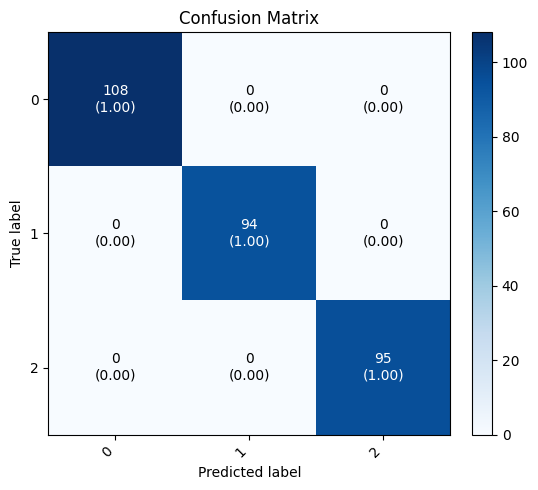

In [25]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(len(set(y_train)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model_mlp = build_model()

history = model_mlp.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

loss_mlp, acc_mlp = model_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nMultilayer NN Accuracy: {acc_mlp:.4f}")
print("Classification Report:\n", classification_report(y_test, np.argmax(model_mlp.predict(X_test_scaled), axis=1)))
plot_confusion_matrix(y_test, np.argmax(model_mlp.predict(X_test_scaled), axis=1), classes=clf.classes_)

# Comentarios

* Se entrenaron y probaron 10 modelos: Regresión Logística, LDA, QDA, K‑NN, Árbol de Decisión, Random Forest, AdaBoost, XGBoost, un MLP y una red neuronal densa.

* Cada modelo entrega accuracy, precision, recall y F1 de 1.00 en las tres clases; las matrices de confusión son totalmente diagonales. El resultado se aprecia desde la Regresión Logística hasta la red neuronal.

* Desde el EDA se pudo apreciar que existían tres clústeres muy bien separados en prácticamente todas las variables y, en particular, en el trío (X1, X8, X13); es por eso que incluso un clasificador lineal basta para separar las clases sin error.

* Se usó Factor de Inflación de Varianza (VIF) para detectar multicolinealidad, descartando 12 de las 15 variables originales. Las tres restantes (X1, X8 y X13) son suficientes para lograr un 100 % de acierto en Regresión Logística y Árbol de Decisión, lo que demuestra que aún con solo estas 3 variables el modelo sigue siendo igual de efectivo.

* No era necesario realizar GridSearch y ajustar hiperparámetros, ya que los modelos se desempeñaron bien con sus configuraciones predeterminadas. Sin embargo, se exploraron algunos hiperparámetros:
  * *Random Forest*: la búsqueda selecciona solo 5 árboles y profundidad ilimitada, con eso basta para 100 % de precisión.
  * *AdaBoost*: óptimo con 10 *stumps* (prof. 1) y *learning\_rate* 0.1.
  * *XGBoost*: 5 árboles, profundidad 3 y *eta* 0.01 ya son suficientes para alcanzar ese mismo 100 % de precisión.

  El punto anterior confirma la simplicidad del conjunto de datos.

* Para las redes neuronales se entrenaron dos modelos:
  * MLP de 60 neuronas (solver lbfgs) entrena rápidamente y obtiene 1.0 de accuracy.
  * Red Keras 64‑32 con drop‑out 0.3 y early stopping detiene el entrenamiento en la época 84 con val\_loss $≈1 × 10^{-8}$.

  Un valor de pérdida tan bajo y el 100 % en validación y prueba es provocado por la separabilidad tan marcada de los datos.

* En la realidad, para este problema, bastaría un modelo interpretable y sencillo como Regresión Logística (o LDA) con las tres variables seleccionadas. Esto nos da transparencia, rapidez y el mismo desempeño que otros modelos más complejos.
